# Мобильная игра Quiz Freeze
## Краткое описание:
ЭТАПЫ, ИЗ КОТОРЫХ СОСТОИТ QUIZ FREEZE:

**Регистрация (registration)** — это обязательный этап. Без регистрации пользователь не может перейти на следующие этапы работы с приложением.

**Старт обучения (tutorial_start)** — опциональный этап. Пользователь после регистрации может перейти к обучению работе с приложением, а может и не перейти. При этом вернуться к обучению можно в любой момент. А ещё можно пройти обучение несколько раз.

**Завершение обучения (tutorial_finish)** может произойти только в случае, если ранее произошло событие «Старт обучения», но при этом пользователь может не завершить обучение.

**Выбор уровня сложности вопросов (level_choice)** — это обязательное событие, которое нужно для того, чтобы перейти к выбору пакетов вопросов. Таким образом, пользователь может не пройти обучение или даже не начинать его, но прежде чем начать отвечать, он обязан выбрать уровень сложности.

**Выбор пакетов вопросов (pack_choice, или training_choice)** — это этап, на котором пользователь выбирает себе бесплатный набор пакетов вопросов, на которые он будет отвечать.

**Покупка платных пакетов вопросов (хранятся в таблице purchase)** — это факт совершения оплаты за вопросы, которые не доступны в списке бесплатных вопросов.

## Задание №1
Проверить, отличается ли время прохождения различных этапов для пользователей, которые прошли обучение, от пользователей, не начинавших обучение. Насколько обучение сокращает время прохождения этапов?  

Пояснение к ходу решения задания:  
Далее сравниваться будут только такие этапы игры как "Выбор уровня сложности", "Выбор пакета вопросов", "Оплата", т.к. этап "Регистрация" является первоначальным, с которого пользователь начинает взаимодействие с игрой, а этапы прохождения обучения являются опциональными ждя пользователя.   

По общему условию интересуют только те пользователи, которые зарегистрировались в 2018г.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
event = pd.read_csv('7_4_Events.csv')
display(event.head(2))
purchase = pd.read_csv('purchase.csv')
display(purchase.head(2))

,id,event_type,selected_level,start_time,tutorial_id,user_id
0,28903,registration,NaN,2016-05-11T23:40:55,NaN,12583
1,28904,registration,NaN,2016-05-11T23:49:58,NaN,12584


,id,user_id,event_datetime,amount
0,15674,12584,2016-05-12T10:34:16,100
1,15675,12985,2016-05-13T08:25:56,50


In [3]:
display(event.info())
display(purchase.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252334 entries, 0 to 252333
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              252334 non-null  int64  
 1   event_type      252334 non-null  object 
 2   selected_level  31086 non-null   object 
 3   start_time      252334 non-null  object 
 4   tutorial_id     125103 non-null  float64
 5   user_id         252334 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 11.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956 entries, 0 to 5955
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              5956 non-null   int64 
 1   user_id         5956 non-null   int64 
 2   event_datetime  5956 non-null   object
 3   amount          5956 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 186.2+ KB


None

In [4]:
# создание списка пользователей, зарегистрировавшихся в 2018г.
event_reg_2018 = event[(event['event_type']=='registration') & (event['start_time'] >= '2018-01-01') & (event['start_time'] < '2019-01-01')]
users_reg_2018 = event_reg_2018.user_id.to_list()
print(len(users_reg_2018), '- количество пользователей, зарегистрировавшихся в 2018 году')

19926 - количество пользователей, зарегистрировавшихся в 2018 году


In [5]:
# применение списка с пользователями к общему датафрему (далее дф) event
event_new = event[event.user_id.isin(users_reg_2018)]

# приведение даты к нормальному формату и переименование столбца id
event_new['start_time'] = pd.to_datetime(event_new['start_time'], format='%Y-%m-%dT%H:%M:%S')
event_new = event_new.rename(columns = {'id' : 'event_id'})

event_new.sample(2)

<ipython-input-5-65a21c9281f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_new['start_time'] = pd.to_datetime(event_new['start_time'], format='%Y-%m-%dT%H:%M:%S')


,event_id,event_type,selected_level,start_time,tutorial_id,user_id
98065,126968,tutorial_start,NaN,2018-09-22 17:14:32,44169.0,41683
60340,89243,tutorial_start,NaN,2018-02-20 21:03:55,33949.0,30430


In [6]:
# применение списка с пользователями к общему датафрему (далее дф) purchase
purchase_new = purchase[purchase.user_id.isin(users_reg_2018)]
purchase_new['event_type'] = 'purchase'

# приведение даты к нормальному формату и переименование столбца id
purchase_new = purchase_new.rename(columns = {'id': 'purchase_id'})
purchase_new['event_datetime'] = pd.to_datetime(purchase_new['event_datetime'], format='%Y-%m-%dT%H:%M:%S')

purchase_new.sample(2)

<ipython-input-6-d753306d0c94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_new['event_type'] = 'purchase'


,purchase_id,user_id,event_datetime,amount,event_type
2626,18300,46061,2018-12-04 14:44:20,100,purchase
2632,18306,45717,2018-12-06 07:35:47,25,purchase


In [7]:
# создание объединенного дф
total_event_reg_2018 = pd.merge(event_new, purchase_new, on=['user_id', 'event_type'], how='outer')
total_event_reg_2018.sample(2)

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,event_datetime,amount
55666,136046.0,tutorial_start,NaN,2018-11-13 14:23:31,46538.0,44437,NaN,NaT,NaN
33034,113353.0,tutorial_start,NaN,2018-06-22 12:13:53,40475.0,37590,NaN,NaT,NaN


In [8]:
# создаем дф с минимальным временем регистрации
reg = total_event_reg_2018.query('event_type == "registration"').groupby('user_id', as_index = False).agg({'start_time' : 'min'})
display(reg.head(2))

# создаем дф с минимальным временем начала обучения
t_start = total_event_reg_2018.query('event_type == "tutorial_start"').groupby('user_id', as_index = False).agg({'start_time' : 'min'})
display(t_start.head(2))

# создаем дф с минимальным временем конца обучения
t_finish = total_event_reg_2018.query('event_type == "tutorial_finish"').groupby('user_id', as_index = False).agg({'start_time' : 'min'})
display(t_finish.head(2))

# создаем дф с минимальным временем выбора уровня
lvl_choice = total_event_reg_2018.query('event_type == "level_choice"').groupby('user_id', as_index = False).agg({'start_time' : 'min'})
display(lvl_choice.head(2))

# создаем дф с минимальным временем выбора пакета
pk_choice = total_event_reg_2018.query('event_type == "pack_choice"').groupby('user_id', as_index = False).agg({'start_time' : 'min'})
display(pk_choice.head(2))

# создаем дф с минимальным временем оплаты
purch = total_event_reg_2018.query('event_type == "purchase"').groupby('user_id', as_index = False).agg({'event_datetime' : 'min'})
display(purch.head(2))

,user_id,start_time
0,27832,2018-01-01 03:48:40
1,27833,2018-01-01 04:07:25


,user_id,start_time
0,27833,2018-01-01 17:47:40
1,27834,2018-01-01 19:46:11


,user_id,start_time
0,27833,2018-01-01 17:50:08
1,27834,2018-01-01 19:48:01


,user_id,start_time
0,27835,2018-01-01 20:37:22
1,27839,2018-01-01 22:37:50


,user_id,start_time
0,27835,2018-01-01 20:38:43
1,27839,2018-01-01 22:42:54


,user_id,event_datetime
0,27845,2018-01-03 18:53:43
1,27865,2018-01-04 14:46:10


In [9]:
# поочередное объединение дф
m1 = pd.merge(reg, t_start, on='user_id', how='outer')
m2 = pd.merge(m1, t_finish, on='user_id', how='outer')
m3 = pd.merge(m2, lvl_choice, on='user_id', how='outer')
m4 = pd.merge(m3, pk_choice, on='user_id', how='outer')
m5 = pd.merge(m4, purch, on='user_id', how='outer')

# переименование столбцов
m5.columns = ['user_id', 'reg_time', 't_start_time', 't_finish_time', 'lvl_choice_time', 'pk_choice_time', 'purch_time']

# заполнение пустых значений нолями
m5.reg_time = m5['reg_time'].fillna(0)
m5.t_start_time = m5['t_start_time'].fillna(0)
m5.t_finish_time = m5['t_finish_time'].fillna(0)
m5.lvl_choice_time = m5['lvl_choice_time'].fillna(0)
m5.pk_choice_time = m5['pk_choice_time'].fillna(0)
m5.purch_time = m5['purch_time'].fillna(0)
m5.sample(2)

,user_id,reg_time,t_start_time,t_finish_time,lvl_choice_time,pk_choice_time,purch_time
17954,45786,2018-11-28 10:15:48,0,0,0,0,0
16981,44813,2018-11-17 20:27:13,2018-11-18 00:31:12,0,0,0,0


In [10]:
#создание нового столбца по условию закончил пользователь обучение или не начинал
def func1(row):
    if row.t_finish_time != 0:
        return "done"
    if row.t_start_time == 0:
        return "not_start"

tut_done_or_not_start = m5.apply(lambda row: func1(row), axis=1)  
  
m5['tut_done_or_not_start'] = tut_done_or_not_start
m5.sample(2)

,user_id,reg_time,t_start_time,t_finish_time,lvl_choice_time,pk_choice_time,purch_time,tut_done_or_not_start
378,28210,2018-01-11 16:50:20,2018-01-12 00:06:23,0,0,0,0,None
11081,38913,2018-07-18 19:21:10,0,0,0,0,0,not_start


In [11]:
# создание нового столбца с разницей во времени между этапами выбора уровня и выбора пакета
def func2(row):
    if row.lvl_choice_time != 0 and row.pk_choice_time != 0:
        return (row.pk_choice_time - row.lvl_choice_time)

lvl_pk = m5.apply(lambda row: func2(row), axis=1)  
m5['lvl_pk'] = lvl_pk

# создание нового столбца с разницей во времени между этапами выбора пакета и оплатой
def func3(row):
    if row.pk_choice_time != 0 and row.purch_time != 0:
        return (row.purch_time - row.pk_choice_time)

purch_pk = m5.apply(lambda row: func3(row), axis=1)  
m5['purch_pk'] = purch_pk

m5.sample(2)

,user_id,reg_time,t_start_time,t_finish_time,lvl_choice_time,pk_choice_time,purch_time,tut_done_or_not_start,lvl_pk,purch_pk
5837,33669,2018-04-07 12:18:05,2018-04-07 17:15:29,2018-04-07 17:20:45,2018-04-07 20:12:30,0,0,done,NaT,NaT
6077,33909,2018-04-12 10:06:06,0,0,0,0,0,not_start,NaT,NaT


In [12]:
# создаем дф, удаляем пропуски 
m6 = m5[['user_id','tut_done_or_not_start','lvl_pk']].dropna()

m7 = m6[m6['tut_done_or_not_start']=='done']
print(m7.lvl_pk.mean(),' - средняя разница во времени между этапами выбора уровня и выбора пакета у тех, кто завершил обучение')

m8 = m6[m6['tut_done_or_not_start']=='not_start']
print(m8.lvl_pk.mean(),'- средняя разница во времени между этапами выбора уровня и выбора пакета у тех, кто обучение не начинал')

0 days 00:05:18.146058732  - средняя разница во времени между этапами выбора уровня и выбора пакета у тех, кто завершил обучение
0 days 00:05:23.824324324 - средняя разница во времени между этапами выбора уровня и выбора пакета у тех, кто обучение не начинал


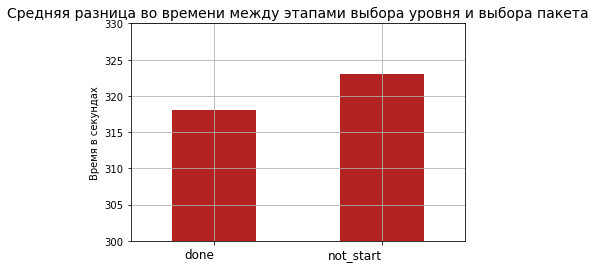

In [13]:
# количество секунд
m7_sec = np.timedelta64(m7.lvl_pk.mean(),'s') / np.timedelta64(1, 's') 
m8_sec = np.timedelta64(m8.lvl_pk.mean(),'s') / np.timedelta64(1, 's')

#построение графика
df = pd.DataFrame([['done', m7_sec],
                  ['not_start', m8_sec]], 
columns=['tutorial','lvl_pk'])

ax = df['lvl_pk'].plot(kind = 'bar', grid = True, color='firebrick')
ax.set_title('Cредняя разница во времени между этапами выбора уровня и выбора пакета', fontdict={'size':14})
ax.set(ylabel='Время в секундах', ylim=(300, 330))
_ = plt.xticks(df.index, df.tutorial, rotation=0, horizontalalignment='right', fontsize=12)

#### Сравнение времени меэжу этапом выбора уровня сложности и выбора пакета:
Средняя разница во времени между этами выбора уровня и выбора пакета для пользователей прошедших обучений и даже не начинавших его не слишком сильно разнится между собой (отклонение около 1,5%) и составляет 318 и 323 секунды соответственно.

In [14]:
# создаем дф, удаляем пропуски 
m9 = m5[['user_id','tut_done_or_not_start','purch_pk']].dropna()

m10 = m9[m9['tut_done_or_not_start']=='done']
print(m10.purch_pk.mean(),'- средняя разница во времени между этапами выбора пакета и оплатой у тех, кто завершил обучение')

m11 = m9[m9['tut_done_or_not_start']=='not_start']
print(m11.purch_pk.mean(),'- средняя разница во времени между этапами выбора пакета и оплатой у тех, кто обучение не начинал')

3 days 17:17:59.641326883 - средняя разница во времени между этапами выбора пакета и оплатой у тех, кто завершил обучение
4 days 04:49:33.590909090 - средняя разница во времени между этапами выбора пакета и оплатой у тех, кто обучение не начинал


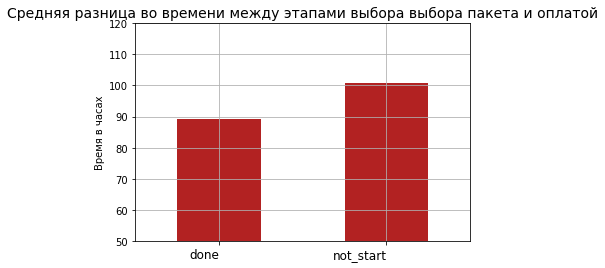

In [15]:
# количество часов
m10_hour = round(np.timedelta64(m10.purch_pk.mean(),'s') / np.timedelta64(1, 's') / 3600, 1) 
m11_hour = round(np.timedelta64(m11.purch_pk.mean(),'s') / np.timedelta64(1, 's') / 3600, 1)
 
#построение графика
df = pd.DataFrame([['done', m10_hour],
                  ['not_start', m11_hour]], 
columns=['tutorial','purch_pk'])

ax = df['purch_pk'].plot(kind = 'bar', grid = True, color='firebrick')
ax.set_title('Cредняя разница во времени между этапами выбора выбора пакета и оплатой', fontdict={'size':14})
ax.set(ylabel='Время в часах', ylim=(50, 120))
_ = plt.xticks(df.index, df.tutorial, rotation=0, horizontalalignment='right', fontsize=12)

#### Сравнение времени между этапом выбора пакета и оплаты:
Средняя разница во времени между этами выбора пакета и оплатой для пользователей прошедших обучений и даже не начинавших отличается довольно сильно между собой (отклонение около 13%) и составляет 89.3 и 100.8 часов соответственно.

### Вывод:
**Успешное окончание пользователем обучения действительно влияет на время прохождение этапов в игре**.  

Сравнение времени между этапами выбора уровня сложности и выбора пакета показало минимальное различие **~5 секунд (1,5%)**, в то время как сравнение времени между этапами выбора пакета и оплаты показало различие уже на **~11,5 часов (13%)**

## Задание №2
Посмотреть, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь.

Пояснение к ходу решения задания:  

По общему условию интересуют только те пользователи, которые зарегистрировались в 2018г.

In [16]:
total_event_reg_2018.sample(2)

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,event_datetime,amount
60101,140398.0,registration,NaN,2018-11-28 10:14:26,NaN,45785,NaN,NaT,NaN
706,81013.0,tutorial_finish,NaN,2018-01-09 16:17:19,31689.0,28070,NaN,NaT,NaN


In [17]:
# список тех, кто начинал обучение
us_start_tut = set(total_event_reg_2018[total_event_reg_2018['event_type']=='tutorial_start'].user_id)

# список тех, кто закончил обучение
us_finish_tut = set(total_event_reg_2018[total_event_reg_2018['event_type']=='tutorial_finish'].user_id)

# список тех, кто НЕ начинал обучение
all_users = set (total_event_reg_2018['user_id'])
us_not_start_tut = all_users.difference(us_start_tut)

# список тех, кто начинал обучение, но не закончил его 
us_not_finish_tut = us_start_tut.difference(us_finish_tut)

In [18]:
pay = total_event_reg_2018[total_event_reg_2018.event_type == 'purchase']
a = pay.user_id.nunique()
print('{} - количество пользователей, совершивших оплату'.format(a)) 
aa = total_event_reg_2018.user_id.nunique()
print('{} - процент пользователей, совершивших оплату от общего количества пользователей'.format(round(a/aa*100,2))) 

1600 - количество пользователей, совершивших оплату
8.03 - процент пользователей, совершивших оплату от общего количества пользователей


In [19]:
#  количество пользователей, начинавших обучение и совершавших оплату
us_tut_start_pay = pay[pay.user_id.isin(us_start_tut)].user_id.unique() 
b = pay[pay.user_id.isin(us_start_tut)].user_id.nunique()
print('{} - количество пользователей, начинавших обучение и совершавших оплату'.format(b))
print('{} - процент пользователей, совершивших оплату из тех, кто начал обучение'.format(round(b/len(us_start_tut)*100,2)))

1578 - количество пользователей, начинавших обучение и совершавших оплату
13.31 - процент пользователей, совершивших оплату из тех, кто начал обучение


In [20]:
#  количество пользователей, закончивших обучение и совершавших оплату
us_tut_finish_pay = pay[pay.user_id.isin(us_finish_tut)].user_id.unique() 
c = pay[pay.user_id.isin(us_finish_tut)].user_id.nunique() 
print('{} - количество пользователей, закончивших обучение и совершавших оплату'.format(c))
print('{} - процент пользователей, совершивших оплату из тех, кто закончил обучение'.format(round(c/len(us_finish_tut)*100,2)))

1447 - количество пользователей, закончивших обучение и совершавших оплату
14.12 - процент пользователей, совершивших оплату из тех, кто закончил обучение


In [21]:
#  количество пользователей, НЕ начинавших обучение и совершавших оплату
d = pay[pay.user_id.isin(us_not_start_tut)].user_id.nunique()
print('{} - количество пользователей, не начинавших обучение и совершавших оплату'.format(d))
print('{} - процент пользователей, совершивших оплату из тех, кто не начинал обучение'.format(round(d/len(us_not_start_tut)*100,2)))

22 - количество пользователей, не начинавших обучение и совершавших оплату
0.27 - процент пользователей, совершивших оплату из тех, кто не начинал обучение


In [22]:
#  количество пользователей, начинавших обучение, но не закончивших его и совершавших оплату
e = pay[pay.user_id.isin(us_not_finish_tut)].user_id.nunique()
print('{} - количество пользователей, начавших, но не закончивших обучение и совершавших оплату'.format(e))
print('{} - процент пользователей, совершивших оплату из тех, кто начинал обучение, он не закончил его'.format(round(e/len(us_not_finish_tut)*100,2)))

131 - количество пользователей, начавших, но не закончивших обучение и совершавших оплату
8.15 - процент пользователей, совершивших оплату из тех, кто начинал обучение, он не закончил его


In [23]:
# дф с оплатившими пользователями, начинавшие обучение
t1 = total_event_reg_2018[(total_event_reg_2018['event_type'] == 'tutorial_start') & \
                          (total_event_reg_2018.user_id.isin(us_tut_start_pay))]

In [24]:
# оплатившие, начинавшие учиться 
t1_gr = t1.groupby('user_id').agg({'event_type':'count'}).reset_index(drop=False)
t1_gr_gr = t1_gr.groupby('event_type').agg({'user_id':'count'}).reset_index(drop=False)

In [25]:
t2 = total_event_reg_2018[(total_event_reg_2018['event_type'] == 'tutorial_start')]
t2_gr = t2.groupby('user_id').agg({'event_type':'count'}).reset_index(drop=False)
t2_gr_gr = t2_gr.groupby('event_type').agg({'user_id':'count'}).reset_index(drop=False)

In [26]:
# зависимость процента оплаты от количества начатых обучений пользователем
merge_t1_t2 = pd.merge(t1_gr_gr, t2_gr_gr, on='event_type')
merge_t1_t2.columns = ['tutorial_start_count', 'us_pay_count', 'us_count']
merge_t1_t2['percent_pay'] = merge_t1_t2['us_pay_count'] / merge_t1_t2['us_count'] *100
merge_t1_t2

,tutorial_start_count,us_pay_count,us_count,percent_pay
0,1,1207,9103,13.259365
1,2,218,1589,13.719320
2,3,51,427,11.943794
3,4,30,221,13.574661
4,5,16,109,14.678899
5,6,14,116,12.068966
6,7,12,94,12.765957
7,8,13,86,15.116279
8,9,17,113,15.044248


In [27]:
# коэффициент корреляции между количеством начатых обучений пользователем и процентом оплаты
np.corrcoef(merge_t1_t2.tutorial_start_count, merge_t1_t2.percent_pay)[1][0]

0.437441280304913

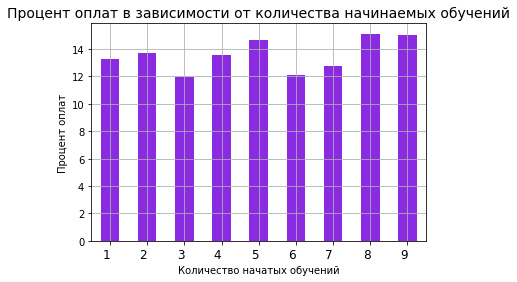

In [28]:
ax = merge_t1_t2['percent_pay'].plot(kind = 'bar', grid = True, color='blueviolet')
ax.set_title('Процент оплат в зависимости от количества начинаемых обучений', fontdict={'size':14})
ax.set(ylabel='Процент оплат', xlabel='Количество начатых обучений')
_ = plt.xticks(merge_t1_t2.index, merge_t1_t2.tutorial_start_count, rotation=0, horizontalalignment='right', fontsize=12)

In [29]:
# дф с оплатившими пользователями, закончившие обучение
t3 = total_event_reg_2018[(total_event_reg_2018['event_type'] == 'tutorial_finish') & \
                          (total_event_reg_2018.user_id.isin(us_tut_finish_pay))]

In [30]:
# оплатившие, закончившие учиться 
t3_gr = t3.groupby('user_id').agg({'event_type':'count'}).reset_index(drop=False)
t3_gr_gr = t3_gr.groupby('event_type').agg({'user_id':'count'}).reset_index(drop=False)

In [31]:
t4 = total_event_reg_2018[(total_event_reg_2018['event_type'] == 'tutorial_finish')]
t4_gr = t4.groupby('user_id').agg({'event_type':'count'}).reset_index(drop=False)
t4_gr_gr = t2_gr.groupby('event_type').agg({'user_id':'count'}).reset_index(drop=False)

In [32]:
# зависимость процента оплаты от количества завершенных обучений пользователем
merge_t3_t4 = pd.merge(t3_gr_gr, t4_gr_gr, on='event_type')
merge_t3_t4.columns = ['tutorial_finish_count', 'us_pay_count', 'us_count']
merge_t3_t4['percent_pay'] = merge_t3_t4['us_pay_count'] / merge_t3_t4['us_count'] *100
merge_t3_t4

,tutorial_finish_count,us_pay_count,us_count,percent_pay
0,1,1143,9103,12.556300
1,2,182,1589,11.453744
2,3,44,427,10.304450
3,4,19,221,8.597285
4,5,19,109,17.431193
5,6,15,116,12.931034
6,7,15,94,15.957447
7,8,6,86,6.976744
8,9,4,113,3.539823


In [33]:
# коэффициент корреляции между количеством завершенных обучений пользователем и процентом оплаты
np.corrcoef(merge_t3_t4.tutorial_finish_count, merge_t3_t4.percent_pay)[1][0]

-0.3564952937520809

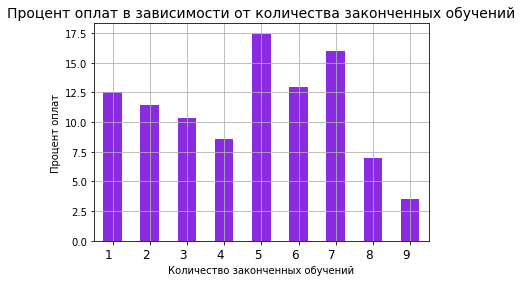

In [34]:
ax = merge_t3_t4['percent_pay'].plot(kind = 'bar', grid = True, color='blueviolet')
ax.set_title('Процент оплат в зависимости от количества законченных обучений', fontdict={'size':14})
ax.set(ylabel='Процент оплат', xlabel='Количество законченных обучений')
_ = plt.xticks(merge_t3_t4.index, merge_t3_t4.tutorial_finish_count, rotation=0, horizontalalignment='right', fontsize=12)

### Вывод:
**Успешное окончание пользователем обучения само по себе влияет на вероятность оплаты**.

**~99%** из всех пользователей, совершивших оплату - начали обучение хотя бы 1 раз.   
**~90%** из всех пользователей, совершивших оплату - закончили обучение хотя бы 1 раз.   
Только **~8%** пользователей, совершивших оплату, начали, но не закончили обучение.

Существует слабая корреляция (**~0.44**) между количеством начатых обучений и вероятностью оплаты.  
Так же существует слабая обратная корреляция (**~-0.36**) между количеством законченных обучений и вероятностью оплаты.

## Задание №3
Как часто пользователи начинают обучение после того, как они выбрали уровень сложности?   
Это позволит нам понять, насколько прозрачен процесс взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.

In [35]:
# создаем дф с максимальным временем начала обучения
t_start_max = total_event_reg_2018.query('event_type == "tutorial_start"').groupby('user_id', as_index = False).agg({'start_time' : 'max'})
display(t_start.head(2))

# создаем дф с минимальным временем выбора уровня
lvl_choice = total_event_reg_2018.query('event_type == "level_choice"').groupby('user_id', as_index = False).agg({'start_time' : 'min'})
display(lvl_choice.head(2))

,user_id,start_time
0,27833,2018-01-01 17:47:40
1,27834,2018-01-01 19:46:11


,user_id,start_time
0,27835,2018-01-01 20:37:22
1,27839,2018-01-01 22:37:50


In [36]:
# объединяем дф, оставляя только тех пользователей, кто выбирал уровень сложности и начинал обучение
m12 = pd.merge(t_start_max, lvl_choice, on='user_id', how='inner')
m12.columns = ['user_id', 'max_time_tutorial_start', 'min_time_level_choice']
m12['timedelta'] = m12.max_time_tutorial_start > m12.min_time_level_choice

m12.sample(3)

,user_id,max_time_tutorial_start,min_time_level_choice,timedelta
3548,36362,2018-05-30 14:48:19,2018-05-30 15:01:36,False
5938,42241,2018-10-03 18:23:30,2018-10-03 20:02:15,False
4109,37717,2018-06-23 17:00:19,2018-06-23 18:34:44,False


In [37]:
f = round(len(m12.query('timedelta == True')) / len(m12) * 100, 2)
print('{} - процент пользователей, выбиравших начало обучения после выбора уровня сложности из всех пользователей, \
кто начинал обучение и выбирал уровень сложности'.format(f))

16.81 - процент пользователей, выбиравших начало обучения после выбора уровня сложности из всех пользователей, кто начинал обучение и выбирал уровень сложности


### Вывод:
**Работа с приложением понятна далеко не всем пользователям.**

**~17%** из всех пользователей, начинавших обучение и выбиравших уровень сложности, выбрали уровень сложности раньше начала обучения, а следовательно работа с приложением понятна не до конца.